In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from numba import jit

# Błąd pierwszego rodzaju (odrzucenie hipotezy zerowej gdy ta jest prawdziwa)

## Zadanie 1

In [183]:
mu_0 = 1.5
sigma = 0.2
n = 1000
N = 1000
M = 100

In [185]:
@jit
def func(alpha):
    res_1 = []
    res_2 = []
    res_3 = []

    for _ in range(M):
        count_1 = 0
        count_2 = 0
        count_3 = 0

        for _ in range(N):
            X = np.random.normal(mu_0, sigma, n)

            Z = (np.mean(X) - mu_0)/(sigma/np.sqrt(n)) 
            
            z_half_alpha = stats.norm.ppf(1 - alpha/2, loc = 0, scale = 1)
            z_alpha = stats.norm.ppf(1 - alpha, loc = 0, scale = 1)

            if Z <= -z_half_alpha or Z >= z_half_alpha: #mu != mu_0
                count_1 += 1

            if Z >= z_alpha: # mu > m_0
                count_2 += 1

            if Z <=  -z_alpha: # mu < mu_0
                count_3 += 1

        prob_1 = count_1/N
        prob_2 = count_2/N
        prob_3 = count_3/N

        res_1.append(prob_1)
        res_2.append(prob_2)
        res_3.append(prob_3)

    return [res_1, res_2, res_3]

In [188]:
alpha = 0.05
result = func(alpha)

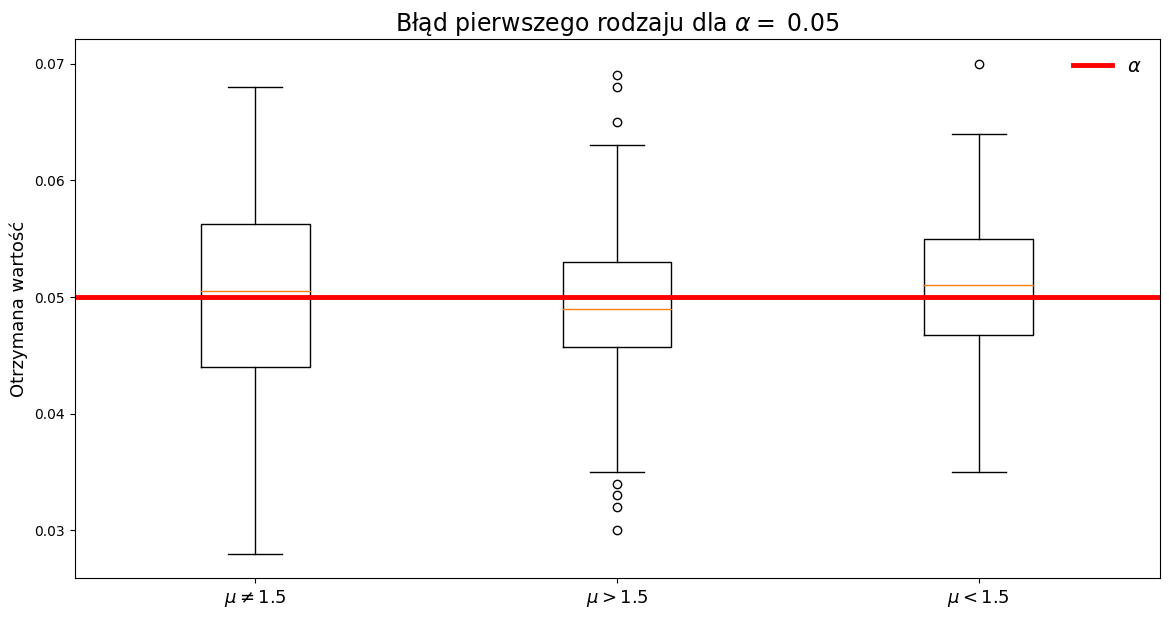

In [189]:
plt.figure(figsize=(14,7))
plt.boxplot(result)
plt.axhline(alpha, label = "$\\alpha$", c = 'r', linewidth = 3.5)
plt.title(f"Błąd pierwszego rodzaju dla $\\alpha =$ {alpha}", size = 17)
plt.xticks([1, 2, 3], ["$\\mu \\neq 1.5$", "$\\mu > 1.5$", "$\\mu < 1.5$"], size = 13)
plt.ylabel("Otrzymana wartość", size = 13)
plt.legend(frameon=False, fontsize="14")

In [192]:
alpha = 0.01
result = func(alpha)

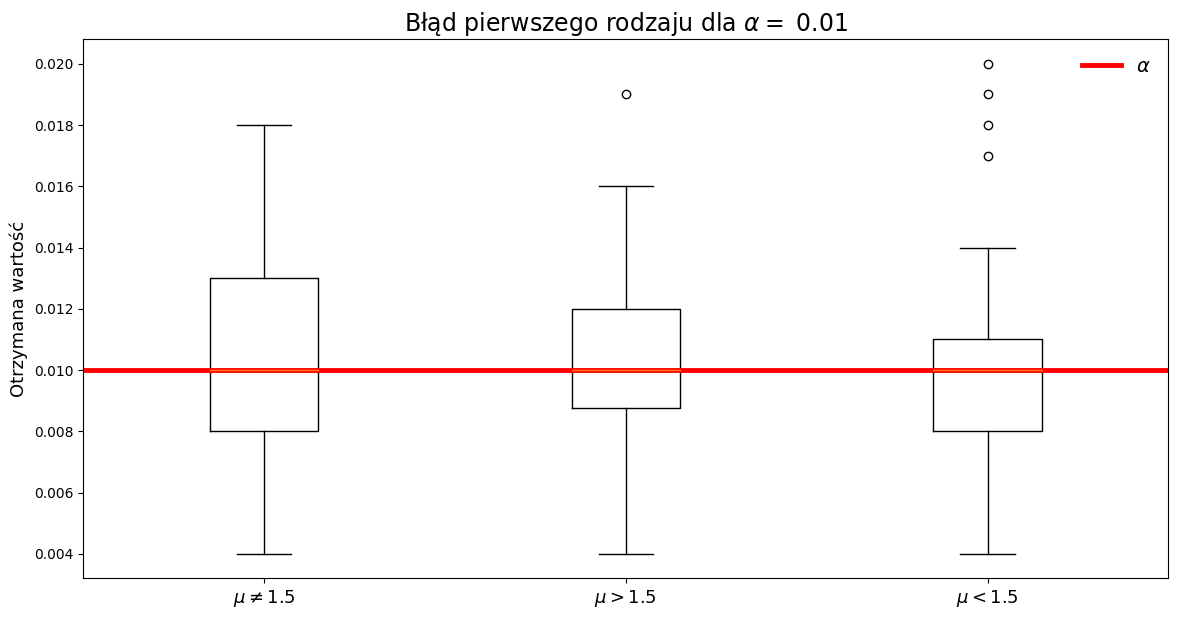

In [193]:
plt.figure(figsize=(14,7))
plt.boxplot(result)
plt.axhline(alpha, label = "$\\alpha$", c = 'r', linewidth = 3.5)
plt.title(f"Błąd pierwszego rodzaju dla $\\alpha =$ {alpha}", size = 17)
plt.xticks([1, 2, 3], ["$\\mu \\neq 1.5$", "$\\mu > 1.5$", "$\\mu < 1.5$"], size = 13)
plt.ylabel("Otrzymana wartość", size = 13)
plt.legend(frameon=False, fontsize="14")

In [196]:
alpha = 0.1
result = func(alpha)

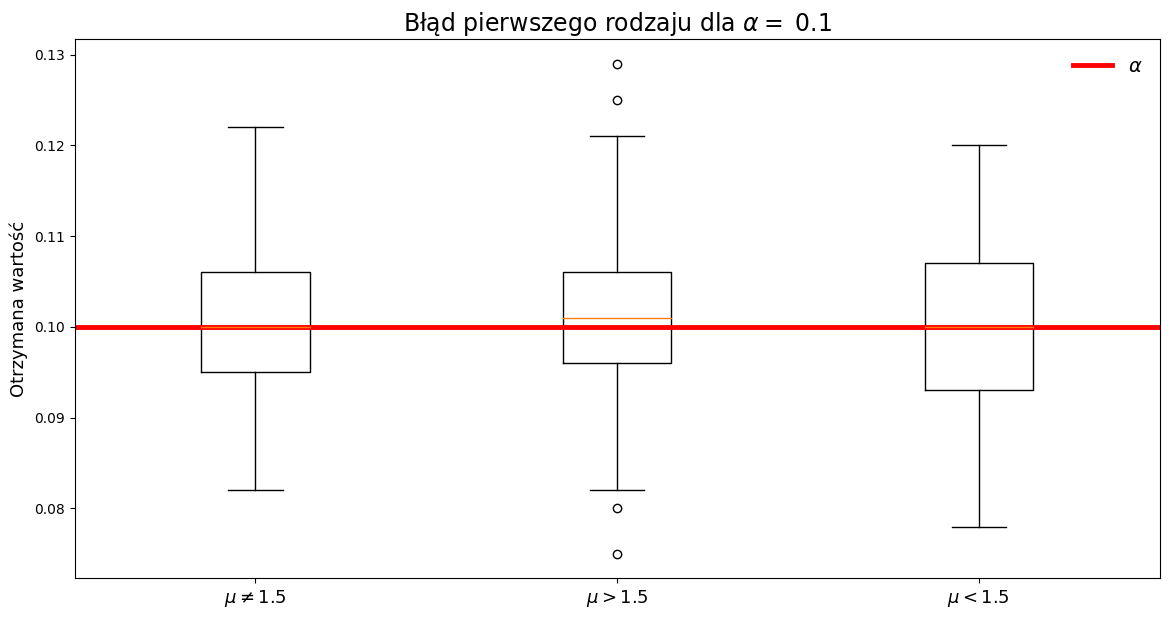

In [197]:
plt.figure(figsize=(14,7))
plt.boxplot(result)
plt.axhline(alpha, label = "$\\alpha$", c = 'r', linewidth = 3.5)
plt.title(f"Błąd pierwszego rodzaju dla $\\alpha =$ {alpha}", size = 17)
plt.xticks([1, 2, 3], ["$\\mu \\neq 1.5$", "$\\mu > 1.5$", "$\\mu < 1.5$"], size = 13)
plt.ylabel("Otrzymana wartość", size = 13)
plt.legend(frameon=False, fontsize="14")

## Zadanie 2

In [169]:
mu = 0.2
sigma_0_squared = 1.5
n = 1000
N = 1000
M = 100

In [171]:
@jit
def func_2(alpha):
    res_1 = []
    res_2 = []
    res_3 = []

    for _ in range(M):
        count_1 = 0
        count_2 = 0
        count_3 = 0

        for _ in range(N):
            X = np.random.normal(mu, np.sqrt(sigma_0_squared), n)

            Chi_2 = sum((X - np.mean(X))**2)/sigma_0_squared
            
            x_half_alpha_1 = stats.chi2.ppf(1 - (alpha/2), n - 1)
            x_half_alpha_2 = stats.chi2.ppf((alpha/2), n - 1)
            x_alpha_1 = stats.chi2.ppf(1 - alpha, n - 1)
            x_alpha_2 = stats.chi2.ppf(alpha, n - 1)

            if Chi_2 <= x_half_alpha_2 or Chi_2 >= x_half_alpha_1: #mu != mu_0
                count_1 += 1

            if Chi_2 >= x_alpha_1: # mu > m_0
                count_2 += 1

            if Chi_2 <=  x_alpha_2: # mu < mu_0
                count_3 += 1

        prob_1 = count_1/N
        prob_2 = count_2/N
        prob_3 = count_3/N

        res_1.append(prob_1)
        res_2.append(prob_2)
        res_3.append(prob_3)

    return [res_1, res_2, res_3]

In [173]:
alpha = 0.05
result = func_2(alpha)

C:\Users\aleks\AppData\Local\Temp\ipykernel_608\3863854365.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "func_2" failed type inference due to: Unknown attribute 'chi2' of type Module(<module 'scipy.stats' from 'c:\\Users\\aleks\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\scipy\\stats\\__init__.py'>)

File "..\..\..\..\..\AppData\Local\Temp\ipykernel_608\3863854365.py", line 17:
<source missing, REPL/exec in use?>

During: typing of get attribute at C:\Users\aleks\AppData\Local\Temp\ipykernel_608\3863854365.py (17)

File "..\..\..\..\..\AppData\Local\Temp\ipykernel_608\3863854365.py", line 17:
<source missing, REPL/exec in use?>

  @jit
C:\Users\aleks\AppData\Local\Temp\ipykernel_608\3863854365.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "func_2" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.Lifte

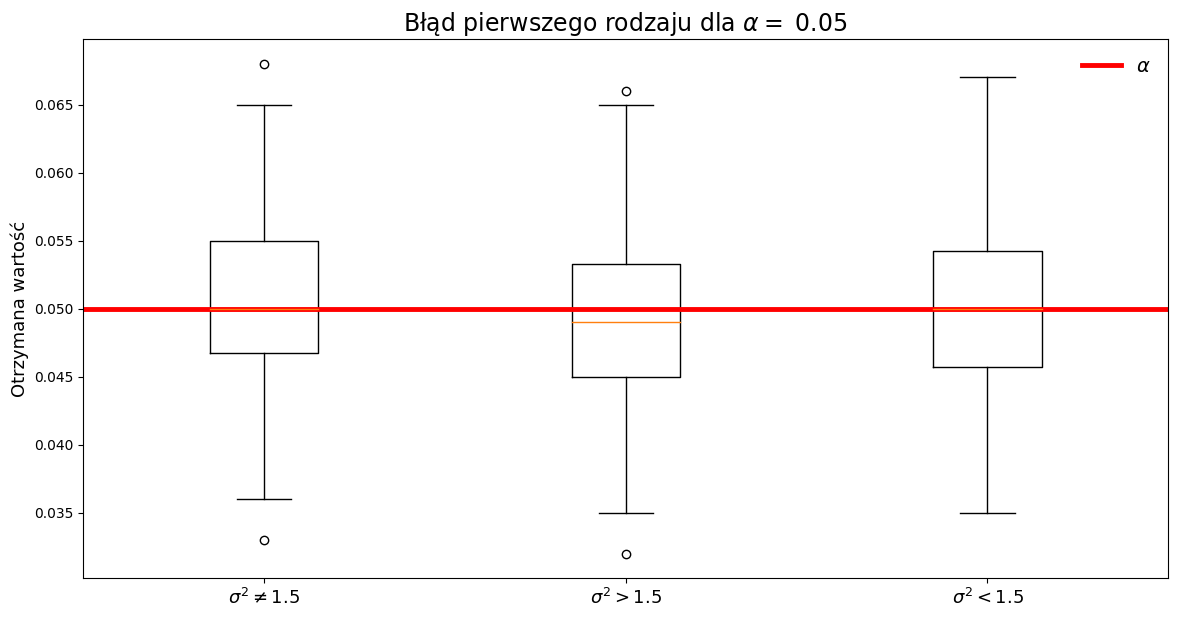

In [174]:
plt.figure(figsize=(14,7))
plt.boxplot(result)
plt.axhline(alpha, label = "$\\alpha$", c = 'r', linewidth = 3.5)
plt.title(f"Błąd pierwszego rodzaju dla $\\alpha =$ {alpha}", size = 17)
plt.xticks([1, 2, 3], ["$\\sigma^{2} \\neq 1.5$", "$\\sigma^{2} > 1.5$", "$\\sigma^{2} < 1.5$"], size = 13)
plt.ylabel("Otrzymana wartość", size = 13)
plt.legend(frameon=False, fontsize="14")

In [175]:
alpha = 0.01
result = func_2(alpha)

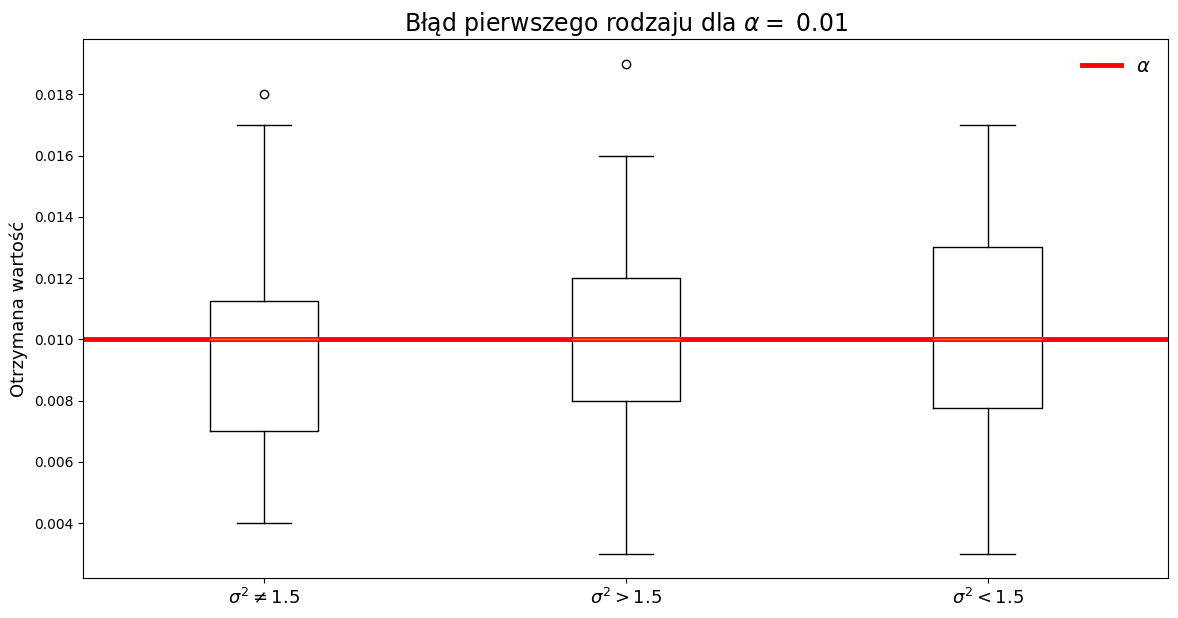

In [176]:
plt.figure(figsize=(14,7))
plt.boxplot(result)
plt.axhline(alpha, label = "$\\alpha$", c = 'r', linewidth = 3.5)
plt.title(f"Błąd pierwszego rodzaju dla $\\alpha =$ {alpha}", size = 17)
plt.xticks([1, 2, 3], ["$\\sigma^{2} \\neq 1.5$", "$\\sigma^{2} > 1.5$", "$\\sigma^{2} < 1.5$"], size = 13)
plt.ylabel("Otrzymana wartość", size = 13)
plt.legend(frameon=False, fontsize="14")

In [177]:
alpha = 0.1
result = func_2(alpha)

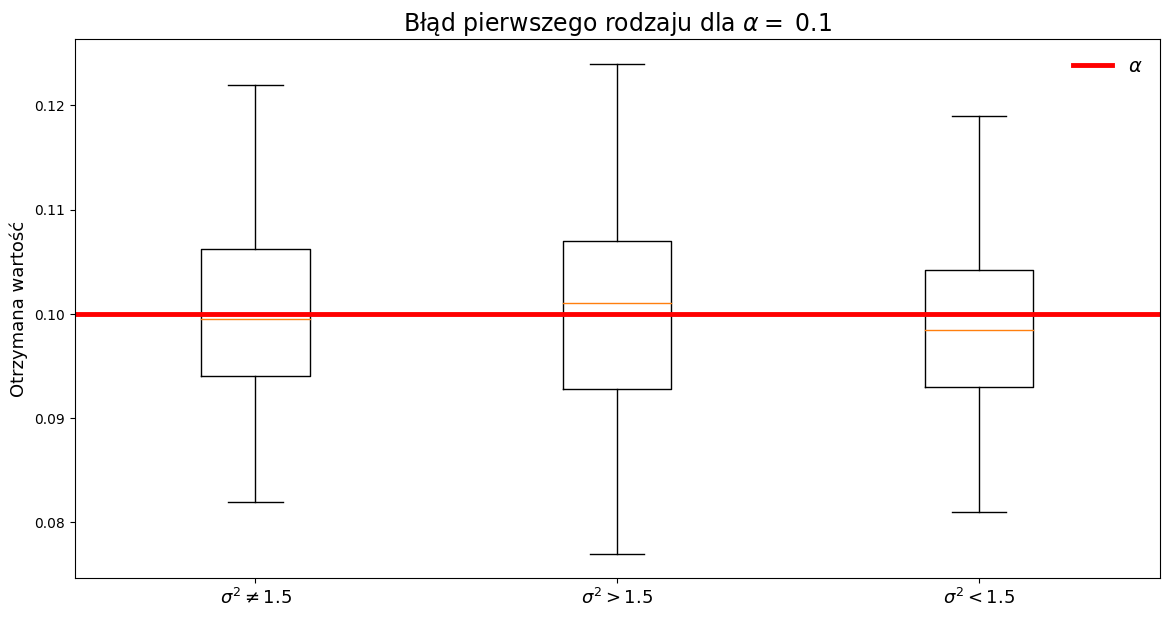

In [178]:
plt.figure(figsize=(14,7))
plt.boxplot(result)
plt.axhline(alpha, label = "$\\alpha$", c = 'r', linewidth = 3.5)
plt.title(f"Błąd pierwszego rodzaju dla $\\alpha =$ {alpha}", size = 17)
plt.xticks([1, 2, 3], ["$\\sigma^{2} \\neq 1.5$", "$\\sigma^{2} > 1.5$", "$\\sigma^{2} < 1.5$"], size = 13)
plt.ylabel("Otrzymana wartość", size = 13)
plt.legend(frameon=False, fontsize="14")

# Błąd drugiego rodzaju (nieodrzucenie fałszywej hipotezy zerowej)

## Zadanie 1

In [2]:
alpha = 0.05
mu_0 = 1.5
sigma = 0.2
n = 1000
N = 1000

# mu_step_1 = np.arange(1.450, 1.550, 0.001)
# mu_step_1= np.delete(mu_step_1, 50)

# mu_step_2 = np.arange(1.51, 1.55, 0.001)
# mu_step_3 = np.arange(1.45, 1.49, 0.001)
mu_step_1 = np.arange(1.450, 1.550, 0.0001)
mu_step_1= np.delete(mu_step_1, 500)

mu_step_2 = np.arange(1.51, 1.55, 0.0001)
mu_step_3 = np.arange(1.45, 1.49, 0.0001)

In [3]:
res_two_1 = []
res_two_2 = []
res_two_3 = []

test_power_1 = []
test_power_2 = []
test_power_3 = []

z_half_alpha = stats.norm.ppf(1 - (alpha/2), loc = 0, scale = 1)
z_alpha = stats.norm.ppf(1 - alpha, loc = 0, scale = 1)
    
for mu in mu_step_1:
    count_two_1 = 0
    for _ in range(N):
        X = np.random.normal(mu, sigma, n)
        Z = (np.mean(X) - mu_0)/(sigma/np.sqrt(n)) 
    
        if -z_half_alpha < Z < z_half_alpha: #mu != mu_0
            count_two_1 += 1

    prob_1 = count_two_1/N
    res_two_1.append(prob_1)
    test_power_1.append(1 - prob_1)
    

for mu in mu_step_2:
    count_two_2 = 0
    for _ in range(N):
        X = np.random.normal(mu, sigma, n)
        Z = (np.mean(X) - mu_0)/(sigma/np.sqrt(n)) 

        if Z < z_alpha: # mu > m_0
            count_two_2 += 1
    prob_2 = count_two_2/N
    res_two_2.append(prob_2)
    test_power_2.append(1 - prob_2)

for mu in mu_step_3:
    count_two_3 = 0
    for _ in range(N):
        X = np.random.normal(mu, sigma, n)
        Z = (np.mean(X) - mu_0)/(sigma/np.sqrt(n))
         
        if Z >  -z_alpha: # mu < mu_0
            count_two_3 += 1
    prob_3 = count_two_3/N
    res_two_3.append(prob_3)
    test_power_3.append(1 - prob_3)


Text(0, 0.5, 'Wartości błędu drugiego rodzaju')

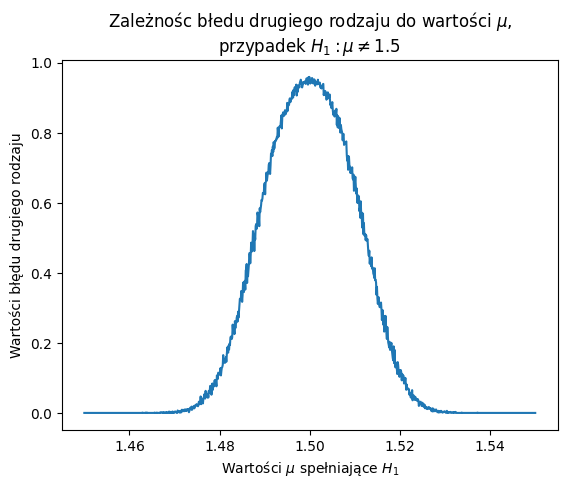

In [4]:
plt.plot(mu_step_1, res_two_1)
plt.title("Zależnośc błedu drugiego rodzaju do wartości $\\mu$,\nprzypadek $H_{1}:\\mu \\neq 1.5$")
plt.xlabel("Wartości $\\mu$ spełniające $H_{1}$")
plt.ylabel("Wartości błędu drugiego rodzaju")

Text(0, 0.5, 'Wartości mocy testu')

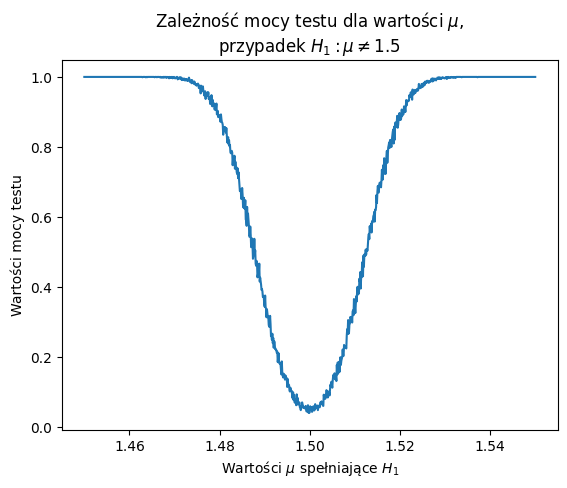

In [5]:
plt.plot(mu_step_1, test_power_1)
plt.title("Zależność mocy testu dla wartości $\\mu$,\nprzypadek $H_{1}:\\mu \\neq 1.5$")
plt.xlabel("Wartości $\\mu$ spełniające $H_{1}$")
plt.ylabel("Wartości mocy testu")

Text(0, 0.5, 'Wartości błędu drugiego rodzaju')

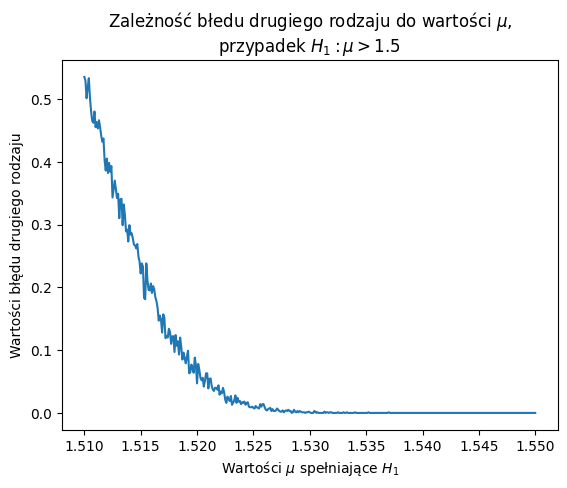

In [6]:
plt.plot(mu_step_2, res_two_2)
plt.title("Zależność błedu drugiego rodzaju do wartości $\\mu$,\nprzypadek $H_{1}:\\mu > 1.5$")
plt.xlabel("Wartości $\\mu$ spełniające $H_{1}$")
plt.ylabel("Wartości błędu drugiego rodzaju")

Text(0, 0.5, 'Wartości mocy testu')

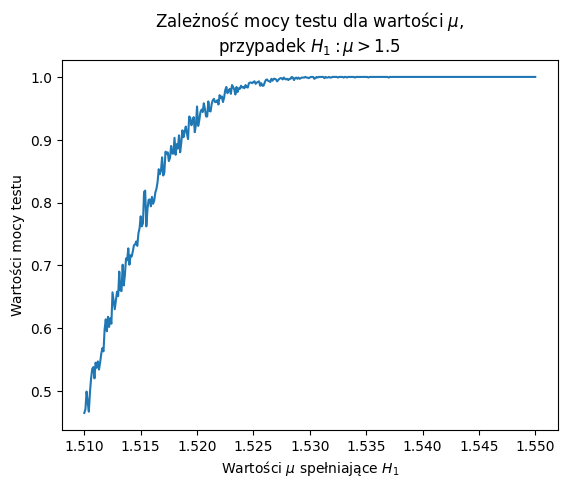

In [7]:
plt.plot(mu_step_2, test_power_2)
plt.title("Zależność mocy testu dla wartości $\\mu$,\nprzypadek $H_{1}:\\mu > 1.5$")
plt.xlabel("Wartości $\\mu$ spełniające $H_{1}$")
plt.ylabel("Wartości mocy testu")

Text(0, 0.5, 'Wartości błędu drugiego rodzaju')

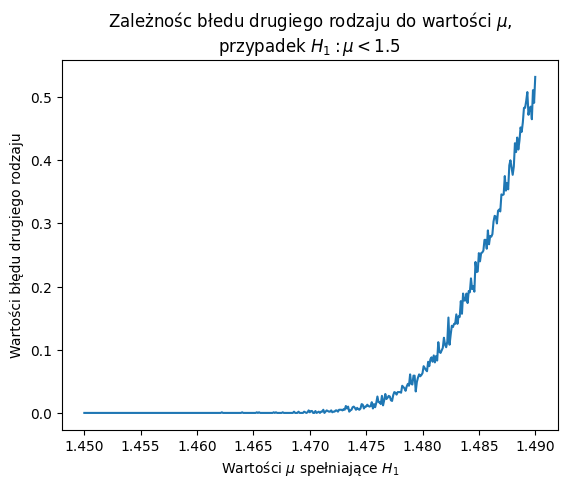

In [8]:
plt.plot(mu_step_3, res_two_3)
plt.title("Zależnośc błedu drugiego rodzaju do wartości $\\mu$,\nprzypadek $H_{1}:\\mu < 1.5$")
plt.xlabel("Wartości $\\mu$ spełniające $H_{1}$")
plt.ylabel("Wartości błędu drugiego rodzaju")

Text(0, 0.5, 'Wartości mocy testu')

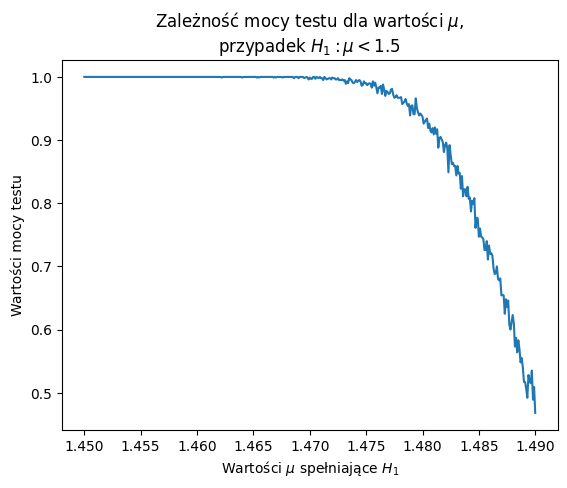

In [9]:
plt.plot(mu_step_3, test_power_3)
plt.title("Zależność mocy testu dla wartości $\\mu$,\nprzypadek $H_{1}:\\mu < 1.5$")
plt.xlabel("Wartości $\\mu$ spełniające $H_{1}$")
plt.ylabel("Wartości mocy testu")

# Zadanie 2

In [18]:
alpha = 0.05
mu = 0.2
sigma_0_squared = 1.5
n = 1000
N = 1000

sigma_step_1 = np.arange(1, 2, 0.001)
sigma_step_1= np.delete(sigma_step_1, 500)

sigma_step_2 = np.arange(1.51, 2, 0.001)
sigma_step_3 = np.arange(1, 1.49, 0.001)

# sigma_step_1 = np.arange(1, 2, 0.01)
# sigma_step_1= np.delete(sigma_step_1, 50)

# sigma_step_2 = np.arange(1.51, 2, 0.01)
# sigma_step_3 = np.arange(1, 1.49, 0.01)

In [19]:
res_two_chi_1 = []
res_two_chi_2 = []
res_two_chi_3 = []

test_power_chi_1 = []
test_power_chi_2 = []
test_power_chi_3 = []

x_half_alpha_1 = stats.chi2.ppf(1 - (alpha/2), n - 1)
x_half_alpha_2 = stats.chi2.ppf((alpha/2), n - 1)
x_alpha_1 = stats.chi2.ppf(1 - alpha, n - 1)
x_alpha_2 = stats.chi2.ppf(alpha, n - 1)
    
for sigma in sigma_step_1:
    count_two_1 = 0
    for _ in range(N):
        X = np.random.normal(mu, np.sqrt(sigma), n)
        Chi_2 = sum((X - np.mean(X))**2)/sigma_0_squared
    
        if x_half_alpha_2 < Chi_2 < x_half_alpha_1: #mu != mu_0
            count_two_1 += 1

    prob_1 = count_two_1/N
    res_two_chi_1.append(prob_1)
    test_power_chi_1.append(1 - prob_1)
    

for sigma in sigma_step_2:
    count_two_2 = 0
    for _ in range(N):
        X = np.random.normal(mu, np.sqrt(sigma), n)
        Chi_2 = sum((X - np.mean(X))**2)/sigma_0_squared

        if Chi_2 < x_alpha_1: # mu > m_0
            count_two_2 += 1
    prob_2 = count_two_2/N
    res_two_chi_2.append(prob_2)
    test_power_chi_2.append(1 - prob_2)

for sigma in sigma_step_3:
    count_two_3 = 0
    for _ in range(N):
        X = np.random.normal(mu, np.sqrt(sigma), n)
        Chi_2 = sum((X - np.mean(X))**2)/sigma_0_squared
         
        if Chi_2 >  x_alpha_2: # mu < mu_0
            count_two_3 += 1
    prob_3 = count_two_3/N
    res_two_chi_3.append(prob_3)
    test_power_chi_3.append(1 - prob_3)

Text(0, 0.5, 'Wartości błędu drugiego rodzaju')

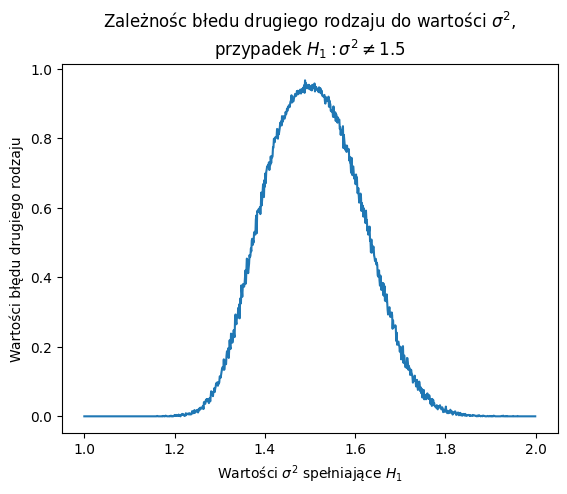

In [20]:
plt.plot(sigma_step_1, res_two_chi_1)
plt.title("Zależnośc błedu drugiego rodzaju do wartości $\\sigma^{2}$,\nprzypadek $H_{1}:\\sigma^{2} \\neq 1.5$")
plt.xlabel("Wartości $\\sigma^{2}$ spełniające $H_{1}$")
plt.ylabel("Wartości błędu drugiego rodzaju")

Text(0, 0.5, 'Wartości mocy testu')

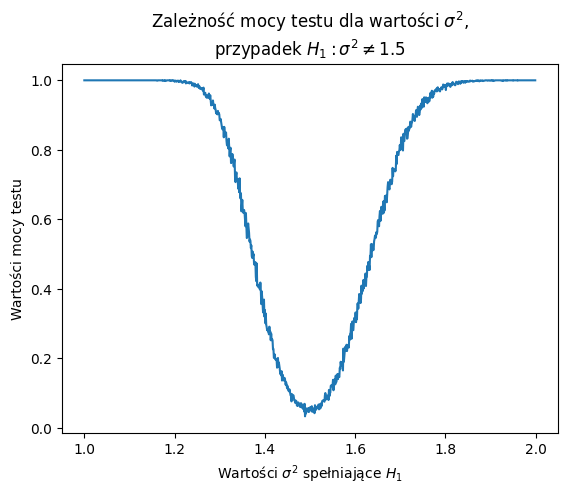

In [21]:
plt.plot(sigma_step_1, test_power_chi_1)
plt.title("Zależność mocy testu dla wartości $\\sigma^{2}$,\nprzypadek $H_{1}:\\sigma^{2}\\neq 1.5$")
plt.xlabel("Wartości $\\sigma^{2}$ spełniające $H_{1}$")
plt.ylabel("Wartości mocy testu")

Text(0, 0.5, 'Wartości błędu drugiego rodzaju')

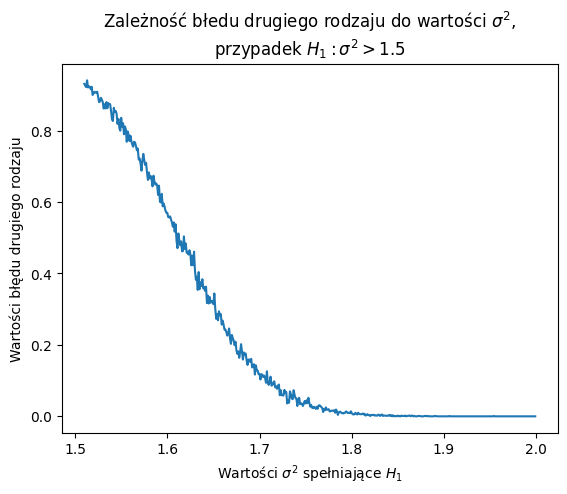

In [22]:
plt.plot(sigma_step_2, res_two_chi_2)
plt.title("Zależność błedu drugiego rodzaju do wartości $\\sigma^{2}$,\nprzypadek $H_{1}:\\sigma^{2} > 1.5$")
plt.xlabel("Wartości $\\sigma^{2}$ spełniające $H_{1}$")
plt.ylabel("Wartości błędu drugiego rodzaju")

Text(0, 0.5, 'Wartości mocy testu')

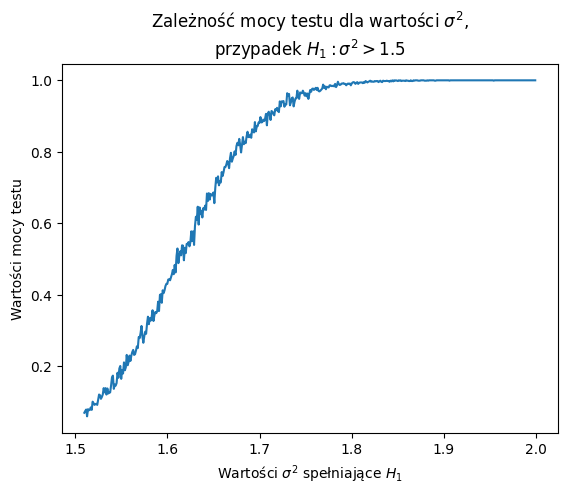

In [23]:
plt.plot(sigma_step_2, test_power_chi_2)
plt.title("Zależność mocy testu dla wartości $\\sigma^{2}$,\nprzypadek $H_{1}:\\sigma^{2} > 1.5$")
plt.xlabel("Wartości $\\sigma^{2}$ spełniające $H_{1}$")
plt.ylabel("Wartości mocy testu")

Text(0, 0.5, 'Wartości błędu drugiego rodzaju')

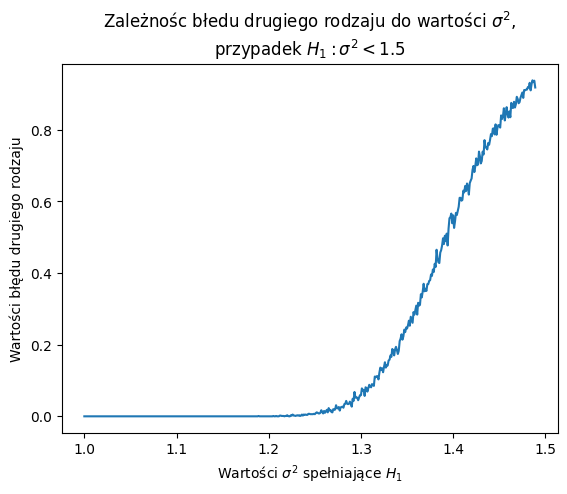

In [24]:
plt.plot(sigma_step_3, res_two_chi_3)
plt.title("Zależnośc błedu drugiego rodzaju do wartości $\\sigma^{2}$,\nprzypadek $H_{1}:\\sigma^{2} < 1.5$")
plt.xlabel("Wartości $\\sigma^{2}$ spełniające $H_{1}$")
plt.ylabel("Wartości błędu drugiego rodzaju")

Text(0, 0.5, 'Wartości mocy testu')

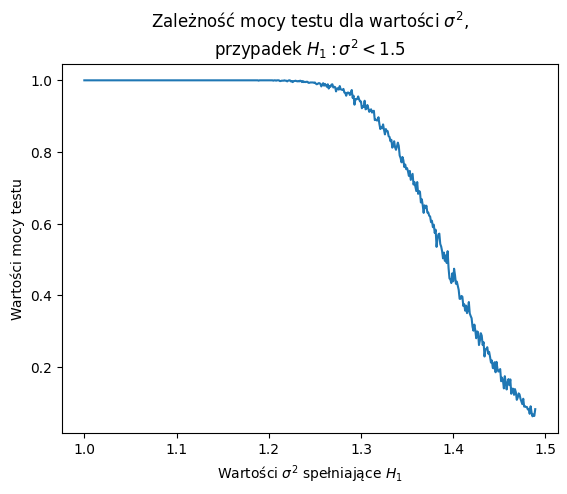

In [25]:
plt.plot(sigma_step_3, test_power_chi_3)
plt.title("Zależność mocy testu dla wartości $\\sigma^{2}$,\nprzypadek $H_{1}:\\sigma^{2} < 1.5$")
plt.xlabel("Wartości $\\sigma^{2}$ spełniające $H_{1}$")
plt.ylabel("Wartości mocy testu")